# Este es el entregable de la práctica del módulo ***Deep Learning***

El objetivo de la práctica es predecir el precio de las viviendas de aribnb mediante redes neuronales, utilizando tanto los datos disponibles en el dataset, como las imágenes que se descargarán desde los enlaces disponibles en un campo del dataset.

Primero se descarga el dataset y se monta la carpeta de drive donde se almacenarán todos los archivos.

In [1]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid


# Direct link

# https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/DL/

/content/drive/MyDrive/DL


In [4]:
# Let's download the dataset
#!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

In [5]:
# Checking what we downloaded
#/content/drive/MyDrive/DL
!ls -ll

total 4217967
-rw------- 1 root root   56950929 Jan 23 00:29 airbnb-listings.csv
-rw------- 1 root root      90176 Jan 26 22:03 enlaces_validos.npy
-rw------- 1 root root 2107542656 Jan 26 22:02 imagenes.npy
-rw------- 1 root root 2107542656 Jan 21 23:45 images.npy
-rw------- 1 root root      89790 Jan 30 01:16 model_plot.png
-rw------- 1 root root    9359326 Jan 30 01:16 test.csv
-rw------- 1 root root   37507299 Jan 30 01:16 train.csv
-rw------- 1 root root     112136 Jan 21 23:45 was_loaded.npy


In [6]:
# Let's read the dataset using Pandas and show some rows
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,...,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,...,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN,NaN,250.0,15.0,2,25,1,1125,3 days ago,NaN,15,42,72,347,2017-04-07,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,NaN,strict,13,5.88,"40.408

In [7]:
# Let's check the shape of our dataset. Rows and columns (variables) 
data.shape

(14001, 89)

In [8]:
# Variable names
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Se extraen las imágenes en un array. Se ha ejecutado una vez y se ha almacenado el resultado en dos archivos para no tener que descargar las imágenes cada vez que se ejecuta el programa. En posteriores ejecuciones se leen esos archivos.

In [9]:
import imageio as io
import cv2
import numpy as np
from numpy import moveaxis
import PIL.Image
'''
imagenes = np.zeros((len(data['Thumbnail Url']), 224, 224, 3), dtype=np.uint8)
enlaces_imagenes = data['Thumbnail Url']


posic = 0
enlaces_validos = []
for idx, enlace in enumerate(enlaces_imagenes):
    if len(enlaces_validos) >= len(data['Thumbnail Url']): #Parará cuando tengamos las n_imagenes imagenes
        print('Finished!')
        print(f'Number of images loaded: {idx}') 
        break
    try:
        img = io.imread(enlace)

        # If channels info is in first place, move to last position
        if (img.shape[0] < img.shape[1] ) and (img.shape[0] < img.shape[2]):
          img = moveaxis(img, 0, 2)

        # In case any image is RGBA, take only RGB channels
        img = img[...,:3]

        # Some images may be in black & white. I convert to to RGB as otherwise it generates error
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        imagenes[posic] = cv2.resize(img, (224, 224))
        enlaces_validos.append(idx)
        posic += 1
        print(f'Imagen {idx} descargada') 
    except IOError as err:
        pass    
''' 

"\nimagenes = np.zeros((len(data['Thumbnail Url']), 224, 224, 3), dtype=np.uint8)\nenlaces_imagenes = data['Thumbnail Url']\n\n\nposic = 0\nenlaces_validos = []\nfor idx, enlace in enumerate(enlaces_imagenes):\n    if len(enlaces_validos) >= len(data['Thumbnail Url']): #Parará cuando tengamos las n_imagenes imagenes\n        print('Finished!')\n        print(f'Number of images loaded: {idx}') \n        break\n    try:\n        img = io.imread(enlace)\n\n        # If channels info is in first place, move to last position\n        if (img.shape[0] < img.shape[1] ) and (img.shape[0] < img.shape[2]):\n          img = moveaxis(img, 0, 2)\n\n        # In case any image is RGBA, take only RGB channels\n        img = img[...,:3]\n\n        # Some images may be in black & white. I convert to to RGB as otherwise it generates error\n        if img.ndim < 3:\n            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)\n\n        imagenes[posic] = cv2.resize(img, (224, 224))\n        enlaces_validos.ap

In [10]:
# Saving images. I'd recommend to save this to not repeat this process
'''
np.save('imagenes.npy', imagenes)
np.save('enlaces_validos.npy', enlaces_validos)
'''

"\nnp.save('imagenes.npy', imagenes)\nnp.save('enlaces_validos.npy', enlaces_validos)\n"

Se leen los archivos de imágenes descargados y almacenados anteriormente para no tener que volver a descargarlos.

In [11]:
import numpy as np

imagenes = np.load('./imagenes.npy')
enlaces_validos = np.load('./enlaces_validos.npy')


Se mantienen los registros de los datos numéricos de aquellos que se han podido obtener imágenes

In [12]:
datos_con_img = data.iloc[enlaces_validos, :]
datos_con_img.shape

(11256, 89)

Se mantienen los registros de imágenes que realmente tienen imágenes descargadas

In [13]:
imagenes = imagenes[:len(enlaces_validos)]
print(imagenes.shape)

(11256, 224, 224, 3)


## Labels

In [14]:
#Se realiza un escalado de la intensidad de los píxeles de las imágenes en el rango de 0 a 1.
#imagenes = imagenes / 255.0
#Este escalado no se puede llevar a cabo en el google colab porque da un error de memoria
#Se ha optado por realizar el reescalado de 0 a 1 en una capa del modelo

Se selecciona la variable objetivo, que es el precio.

In [15]:
# Select what will be our label
y_reg = datos_con_img['Price']

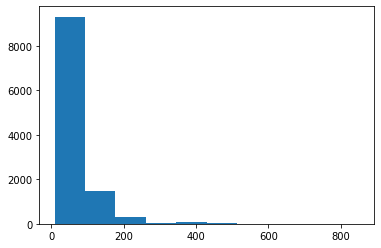

In [16]:
# Plotting the labels
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

## Variables a utilizar

De las 89 variables que hay disponibles en el dataset vamos a quedarnos con las siguientes 14, que son las que utilizamos en la práctica del módulo de Machine Learning. El motivo de haber descartado el resto de variables es porque aparentemente no aportan información para predecir el precio, porque contienen información similar a la de otras variables, porque tienen muchos valores NaN, o porque en la matriz de correlación se observa que están fuertemente correlacionadas con otras variables. 

A esas 14 variables se les unirá la variable "Thumbnail Url", que es desde donde se obtienen las imágenes.

De las 14 variables, 2 son categóricas y 12 numéricas.

Categóricas: 'Property Type' y 'Room Type'.

Numéricas: 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Maximum Nights', 'Number of Reviews', 'Review Scores Rating' y 'Availability'

Se realiza la división del dataset inicial y de la totalidad de las imágenes descargadas en los datasets para entrenamiento y para test

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd

train, test, train_images_all, test_images = train_test_split(datos_con_img, imagenes, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
print(f'Dimensiones del dataset de training de imágenes: {train_images_all.shape}')
print(f'Dimensiones del dataset de test de imágenes: {test_images.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (9004, 89)
Dimensiones del dataset de test: (2252, 89)
Dimensiones del dataset de training de imágenes: (9004, 224, 224, 3)
Dimensiones del dataset de test de imágenes: (2252, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Se realiza la selección de las variables que se van a utilizar en el modelo

In [18]:
#Se establece que pandas muestre todas las filas del dataframe
pd.set_option('max_rows', None)

In [19]:
df.head().T

,0,1,2,3,4
ID,7892449,8554556,18086500,6848088,16729228
Listing Url,https://www.airbnb.com/rooms/7892449,https://www.airbnb.com/rooms/8554556,https://www.airbnb.com/rooms/18086500,https://www.airbnb.com/rooms/6848088,https://www.airbnb.com/rooms/16729228
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación privada exterior azul,COZY FLAT Imperial area A/C WiFi,Habitación amplia en Argüelles!,Apartamento con terraza y piscina,Habitacion grande y luminosa .
Summary,Ideal para mujeres estudiantes y profesionales...,Bonito piso cerca del Palacio Real y la Catedr...,Habitación linda y luminosa con una cama doble...,Luminoso y tranquilo. Zona residencial con pis...,Una habitación grande con cama matrimonial par...
Space,NaN,"Piso amplio, exterior y muy luminoso. Está en ...",Estudiantes y jóvenes profesionales,El apartamento está en una zona residencial en...,"Es un barrio muy tranquilo, la casa tiene 3 ha..."
Description,Ideal para mujeres estudiantes y profesionales...,Bonito piso cerca del Palacio Real y la Catedr...,Habitación linda y luminosa con una cama doble...,Luminoso y tranquilo. Zona residencial con pis...,Una habitación grande con cama matrimonial par...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,tranquilo y seguro,"El barrio es tranquilo, pero a su vez tienes l...","Ubicado en Argüelles-Moncloa, disfrutaras de u...","Cerca de la zona de museos: Ferrocarril, Reina...",A 15 minutos en metro de los principales punto...


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9004.0,1.091489e+07,5.493802e+06,1.986400e+04,6.412637e+06,1.231523e+07,1.573158e+07,1.810984e+07
Scrape ID,9004.0,2.017041e+13,1.139897e+07,2.017032e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
Host ID,9004.0,3.949116e+07,3.549729e+07,1.985400e+04,8.344043e+06,2.913231e+07,6.175774e+07,1.247172e+08
Host Response Rate,7917.0,9.612492e+01,1.282179e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,9001.0,1.124120e+01,3.177208e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.650000e+02
Host Total Listings Count,9001.0,1.124120e+01,3.177208e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.650000e+02
Latitude,9004.0,4.043185e+01,1.813500e-01,3.931747e+01,4.040971e+01,4.041920e+01,4.042958e+01,4.142650e+01
Longitude,9004.0,-3.454556e+00,1.197430e+00,-3.822403e+00,-3.708060e+00,-3.701055e+00,-3.688936e+00,3.467897e+00
Accommodates,9004.0,3.120835e+00,2.010594e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01


Una vez realizado un análisis básico de las características que componen el dataframe se decide que las siguientes características no influyen en el valor de la variable Price, por lo que se procede a eliminarlas

In [21]:
#Características a eliminar

#ID - Identificador (no aporta información para predecir el precio)
#Listing Url - URL (no aporta información para predecir el precio)
#Scrape ID - Identificador del scrapeado (no aporta información para predecir el precio)
#Last Scraped - Fecha del último scrapeado (no aporta información para predecir el precio)
#Name - Nombre (no aporta información para predecir el precio)
#Summary - Resumen (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Street - Calle (no aporta información para predecir el precio, ya que ya tenemos la latitud y longitud)
#Neighbourhood - Barrio (no aporta información para predecir el precio, ya que ya tenemos la latitud y longitud)
#Neighbourhood Cleansed - Barrio (no aporta información para predecir el precio, ya que ya tenemos la latitud y longitud)
#Neighbourhood Group Cleansed - Barrio (no aporta información para predecir el precio, ya que ya tenemos la latitud y longitud)
#Experiences Offered - Experiencias que puedes realizar (no aporta información para predecir el precio)
#Cancellation Policy - Política de cancelación (no aporta información para predecir el precio)
#Space - Descripción de los espacios (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Zipcode - Código postal (ya tenemos la característica de barrio, por lo que no nos aporta muchas más información)
#Description - Descripción (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Neighborhood Overview - Descripción del vecindario (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Notes - Notas (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Transit - Descripción de medios de transporte cercanos (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Access - Diferentes detalles (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Interaction - Detalles acerca de la comunicación con los dueños (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#House Rules - Reglas a cumplir en la vivienda (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Thumbnail Url - URL de descarga de las imágenes (ya la hemos usado y ya no nos hace falta)
#Medium Url - URL (no aporta información para predecir el precio)
#Picture Url - URL (no aporta información para predecir el precio)
#XL Picture Url - URL (no aporta información para predecir el precio)
#Host ID - Identificador del propietario (no aporta información para predecir el precio)
#Host URL - URL del propietario (no aporta información para predecir el precio)
#Host Name - Nombre del propietario (no aporta información para predecir el precio)
#Host Since - Desde cuando está alquilando la vivienda el propietario (no aporta información para predecir el precio)
#Host Location - La ubicación del propietario (no aporta información para predecir el precio)
#Host About - Información acerca del propietario (no aporta información para predecir el precio)
#Host Response Time - Tiempo de respuesta del propietario (no aporta información para predecir el precio)
#Host Response Rate - Ratio de respuesta del propietario (no aporta información para predecir el precio)
#Host Acceptance Rate - Ratio de aceptación del propietario (no aporta información para predecir el precio)
#Host Thumbnail Url - URL del propietario (no aporta información para predecir el precio)
#Host Picture Url - URL del propietario (no aporta información para predecir el precio)
#Host Neighbourhood - Barrio del propietario (no aporta información para predecir el precio)
#Host Listings Count - Número de anuncios del propietario (no aporta información para predecir el precio)
#Host Total Listings Count - Número total de anuncios del propietario (no aporta información para predecir el precio)
#Host Verifications - Información verificada del propietario (no aporta información para predecir el precio)
#State - Comunidad donde está ubicada la vivienda (no nos hace falta esta información para predecir el precio)
#Market - Mercado (no nos hace falta esta información para predecir el precio)
#Smart Location - Ubicación (no nos hace falta esta información para predecir el precio)
#Country Code - Código de país (no nos hace falta esta información para predecir el precio)
#Country - País (no nos hace falta esta información para predecir el precio)
#City - Ciudad (no nos hace falta esta información para predecir el precio)
#Bed Type - Tipo de cama (no aporta información para predecir el precio)
#Amenities - Diferentes servicios o comodidades que posee la vivienda (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Weekly Price - Precio semanal de la vivienda (no nos hace falta esta información porque ya tenemos el campo Price, además, es el campo que tenemos que predecir)
#Monthly Price - Precio mensual de la vivienda (no nos hace falta esta información porque ya tenemos el campo Price, además, es el campo que tenemos que predecir)
#Extra People - Cantidad de personas adicionales (no nos aporta mucha información porque no tiene datos diferentes de cero en los tres primeros cuartiles)
#Calendar Updated- Actualización del calendario (no aporta información para predecir el precio)
#Calendar last Scraped - Fecha de la última vez que se escrapeó esta vivienda (no aporta información para predecir el precio)
#First Review - Fecha del primer review (no aporta información para predecir el precio)
#Last Review - Fecha del último review (no aporta información para predecir el precio)
#License - Licencia de la vivienda (no aporta información para predecir el precio)
#Jurisdiction Names - Nombres de jurisdicción (no aporta información para predecir el precio)
#Calculated host listings count - Número de anuncios del propietario (no aporta información para predecir el precio)
#Geolocation - Geolocalización (es redundante con Latitude y Longitude)
#Features - Características del host y vivienda (no aportan información para predecir el precio)

#Se procede a eliminar las características indicadas
df = df.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary', 'Street', 'City', 'Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Experiences Offered','Cancellation Policy','Space','Zipcode','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','State','Market','Smart Location','Country Code','Country','Bed Type','Amenities','Weekly Price','Monthly Price','Extra People','Calendar Updated','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)
df.head().T

,0,1,2,3,4
Latitude,40.396,40.413,40.4337,40.4014,40.427
Longitude,-3.65062,-3.72136,-3.7154,-3.68672,-3.64578
Property Type,Apartment,House,Apartment,Apartment,House
Room Type,Private room,Entire home/apt,Shared room,Entire home/apt,Private room
Accommodates,1,6,1,2,2
Bathrooms,1.5,1,1,1,1
Bedrooms,1,2,1,1,1
Beds,4,3,1,1,1
Square Feet,NaN,NaN,NaN,NaN,NaN
Price,10,70,30,79,19


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,9004.0,40.431848,0.181350,39.317472,40.409705,40.419200,40.429579,41.426503
Longitude,9004.0,-3.454556,1.197430,-3.822403,-3.708060,-3.701055,-3.688936,3.467897
Accommodates,9004.0,3.120835,2.010594,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,8974.0,1.266214,0.634419,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,8983.0,1.301458,0.844755,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,8973.0,1.972250,1.549528,1.000000,1.000000,1.000000,2.000000,16.000000
Square Feet,309.0,339.210356,496.854376,0.000000,0.000000,55.000000,592.000000,3014.000000
Price,9000.0,65.899444,62.778023,9.000000,30.000000,50.000000,80.000000,850.000000
Security Deposit,3716.0,179.774758,103.957094,70.000000,100.000000,150.000000,200.000000,950.000000
Cleaning Fee,5240.0,28.704771,21.854358,4.000000,15.000000,25.000000,35.000000,325.000000


In [23]:
df.dtypes

Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Square Feet                    float64
Price                          float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Minimum Nights                   int64
Maximum Nights                   int64
Has Availability               float64
Availability 30                  int64
Availability 60                  int64
Availability 90                  int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communicati

Se comprueba el número de NaN que posee cada característica

In [24]:
print(df.isnull().sum(axis=0))

Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        30
Bedrooms                         21
Beds                             31
Square Feet                    8695
Price                             4
Security Deposit               5288
Cleaning Fee                   3764
Guests Included                   0
Minimum Nights                    0
Maximum Nights                    0
Has Availability               9004
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating           1963
Review Scores Accuracy         1971
Review Scores Cleanliness      1968
Review Scores Checkin          1979
Review Scores Communication    1969
Review Scores Location         1981
Review Scores Value         

Se observa que las características 'Square Feet' y 'Has Availability' tienen alrededor de 9000 NaNs, por lo que estas dos características se eliminarán. Así como la característica 'Security Deposit' tiene más de 5000 NaNs, y también se eliminará.

In [25]:
df = df.drop(['Square Feet','Has Availability','Security Deposit'], axis=1)
df.head().T

,0,1,2,3,4
Latitude,40.396,40.413,40.4337,40.4014,40.427
Longitude,-3.65062,-3.72136,-3.7154,-3.68672,-3.64578
Property Type,Apartment,House,Apartment,Apartment,House
Room Type,Private room,Entire home/apt,Shared room,Entire home/apt,Private room
Accommodates,1,6,1,2,2
Bathrooms,1.5,1,1,1,1
Bedrooms,1,2,1,1,1
Beds,4,3,1,1,1
Price,10,70,30,79,19
Cleaning Fee,20,NaN,30,NaN,NaN


In [26]:
df.dtypes

Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Price                          float64
Cleaning Fee                   float64
Guests Included                  int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 30                  int64
Availability 60                  int64
Availability 90                  int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location         float64
Review Scores Value            float64
Reviews per Month        

Se genera la matriz de correlación para analizar las correlaciones de las características.

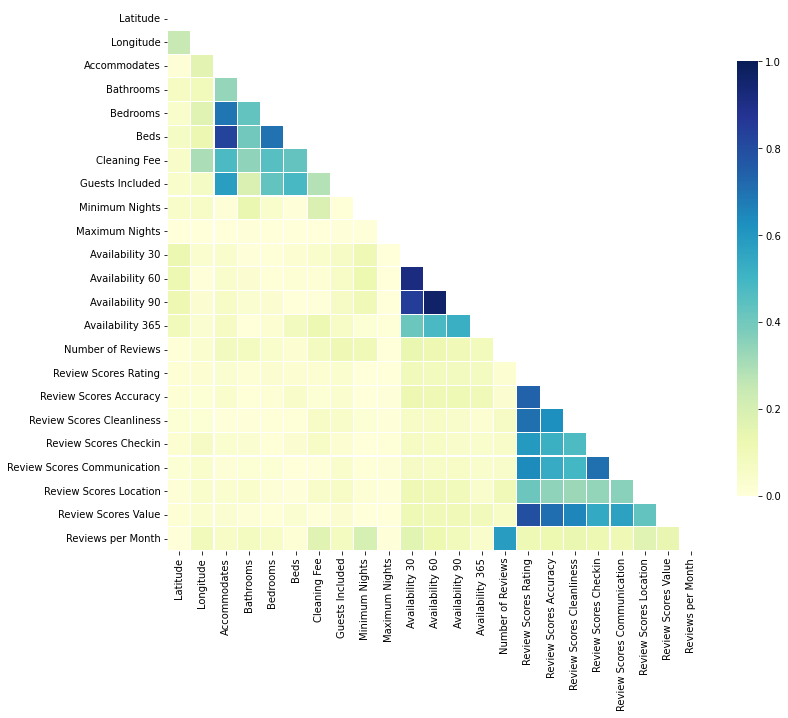

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Como se puede observar en la matriz de correlación, hay características fuertemente relacionadas.

'Beds' está relacionada con 'Accommodates' y 'Bedrooms', por lo que se va a eliminar 'Beds'.

'Availability 30', 'Availability 60' y 'Availability 90' están fuertemente relacionadas, y también están relacionadas con 'Availability 365' por lo que se va a crear una nueva característica que sea la media de la disponibilidad por día de cada una de ellas, después se eliminarán estas 4 características porque ya se dispondrá de la nueva.

La característica 'Number of Reviews' está fuertemente relacionada con 'Reviews per Month', por lo que se queda 'Number of Reviews' porque no tiene nulos y se eliminará la otra.

Las otras características de reviews están fuertemente correlacionadas, por lo que se queda 'Review Scores Rating' que tiene menor número de NaNs y se eliminarán las otras.

In [28]:
df['Availability'] = ((df['Availability 30']/30)+(df['Availability 60']/60)+(df['Availability 90']/90)+(df['Availability 365']/365))/4

df = df.drop(['Beds','Availability 60','Availability 90','Availability 30','Availability 365','Reviews per Month','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'], axis=1)

In [29]:
df.head().T

,0,1,2,3,4
Latitude,40.396,40.413,40.4337,40.4014,40.427
Longitude,-3.65062,-3.72136,-3.7154,-3.68672,-3.64578
Property Type,Apartment,House,Apartment,Apartment,House
Room Type,Private room,Entire home/apt,Shared room,Entire home/apt,Private room
Accommodates,1,6,1,2,2
Bathrooms,1.5,1,1,1,1
Bedrooms,1,2,1,1,1
Price,10,70,30,79,19
Cleaning Fee,20,NaN,30,NaN,NaN
Guests Included,1,2,1,1,1


Ahora se van a sustituir los valores nulos de las características.

Antes de nada se va a ver qué características tienen algún valor nulo.

In [30]:
df.isnull().sum(axis=0)

Latitude                   0
Longitude                  0
Property Type              0
Room Type                  0
Accommodates               0
Bathrooms                 30
Bedrooms                  21
Price                      4
Cleaning Fee            3764
Guests Included            0
Minimum Nights             0
Maximum Nights             0
Number of Reviews          0
Review Scores Rating    1963
Availability               0
dtype: int64

Los valores nulos de la característica 'Cleaning Fee' se sustituyen por el valor 0.

Los valores nulos de las características 'Bathrooms', 'Bedrooms', 'Price' y 'Review Scores Rating', como son variables continuas, se sustituyen por la media.

In [31]:
df['Cleaning Fee'].fillna(0, inplace=True)

df['Bathrooms'].fillna(df['Bathrooms'].mean(),inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean(), inplace=True)

df.isnull().sum(axis=0)

Latitude                0
Longitude               0
Property Type           0
Room Type               0
Accommodates            0
Bathrooms               0
Bedrooms                0
Price                   0
Cleaning Fee            0
Guests Included         0
Minimum Nights          0
Maximum Nights          0
Number of Reviews       0
Review Scores Rating    0
Availability            0
dtype: int64

Se va a realizar el tratamiento de outliers.

Se dibujan los histogramas de todas las variables continuas, y dependiendo de los valores que tengan se les aplicará un determinado tratamiendo a los outliers.

In [32]:
#Se define la función para el tratamiento de outliers mediante el rango intercuartil
#Asignando el valor máximo y mínimo permitido (corte_arriba y corte_abajo) a los valores que se pasan por arriba o por abajo de dichos valores
def rango_intercuartil_outliers(datos, columna):
    cuartil1 = datos[columna].quantile(0.25)
    cuartil3 = datos[columna].quantile(0.75)
    ric = cuartil3-cuartil1 #Rango InterCuartil
    corte_abajo  = cuartil1-1.5*ric
    corte_arriba = cuartil3+1.5*ric
    datos[columna] = np.where(datos[columna]<corte_abajo, corte_abajo, datos[columna])
    datos[columna] = np.where(datos[columna]>corte_arriba, corte_arriba, datos[columna])
    print('Cuartil 1: ',cuartil1)
    print('Cuartil 3: ',cuartil3)
    print('RIC: ',ric)
    print('Corte por abajo: ',corte_abajo)
    print('Corte por arriba: ',corte_arriba)
    return

Primero se dibujará el histograma de cada variable continua, que son las indicadas a continuación y luego, dependiendo de los valores que tenga, se realizará el tratamiento de outliers si hace falta.

'Price', 'Bathrooms', 'Bedrooms', 'Accommodates', 'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Maximum Nights', 'Availability', 'Number of Reviews' y 'Review Scores Rating'

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,9004.0,40.431848,0.181350,39.317472,40.409705,40.419200,40.429579,41.426503
Longitude,9004.0,-3.454556,1.197430,-3.822403,-3.708060,-3.701055,-3.688936,3.467897
Accommodates,9004.0,3.120835,2.010594,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,9004.0,1.266214,0.633361,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,9004.0,1.301458,0.843769,0.000000,1.000000,1.000000,1.000000,10.000000
Price,9004.0,65.899444,62.764075,9.000000,30.000000,50.000000,80.000000,850.000000
Cleaning Fee,9004.0,16.705131,21.872562,0.000000,0.000000,10.000000,29.000000,325.000000
Guests Included,9004.0,1.563305,1.141296,1.000000,1.000000,1.000000,2.000000,16.000000
Minimum Nights,9004.0,2.437583,2.241400,1.000000,1.000000,2.000000,3.000000,27.000000
Maximum Nights,9004.0,1013.318414,10804.613250,1.000000,365.000000,1125.000000,1125.000000,1000000.000000


Se va a analizar si hay outliers en Price. Para eso se procede a dibujar el histograma de Price.

Text(0.5, 0, 'Price')

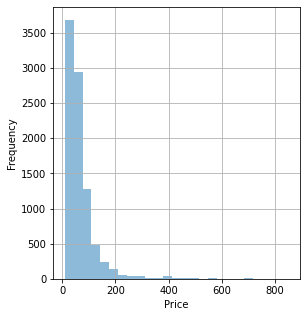

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

En la característica Price se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil

In [35]:
rango_intercuartil_outliers(df,'Price')

Cuartil 1:  30.0
Cuartil 3:  80.0
RIC:  50.0
Corte por abajo:  -45.0
Corte por arriba:  155.0


Se va a analizar si hay outliers en Bathrooms. Para eso se procede a dibujar el histograma de Bathrooms.

Text(0.5, 0, 'Bathrooms')

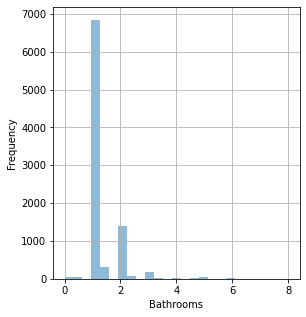

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

En el histograma se observa que hay viviendas que tienen 0 baños, y eso no es posible, por lo que se asignará 1 baño a esas viviendas. El valor más alto es 8 pero puede que haya alguna vivienda grande.

In [37]:
df.loc[df['Bathrooms']==0,'Bathrooms']=1

Se va a analizar si hay outliers en Bedrooms. Para eso se procede a dibujar el histograma de Bedrooms.

Text(0.5, 0, 'Bedrooms')

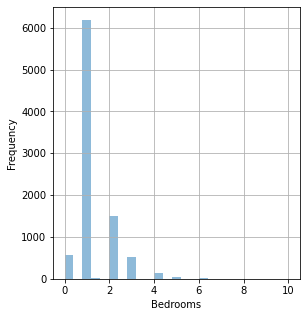

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

Este es el mismo caso que el de Bathrooms, hay algunas viviendas que tienen 0 dormitorios, por lo que a esas viviendas se les asignará 1 dormitorio. El valor más alto es 10 dormitorios, pero puede que haya alguna vivienda grande o que se alquile por habitaciones.

In [39]:
df.loc[df['Bedrooms']==0,'Bedrooms']=1

Se va a analizar si hay outliers en Accommodates. Para eso se procede a dibujar el histograma de Accommodates.

Text(0.5, 0, 'Accommodates')

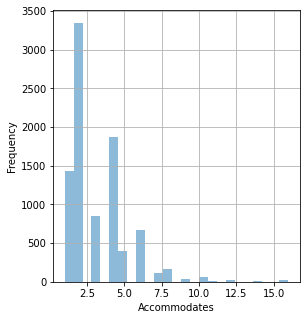

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

En la característica Accommodates se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [41]:
rango_intercuartil_outliers(df,'Accommodates')

Cuartil 1:  2.0
Cuartil 3:  4.0
RIC:  2.0
Corte por abajo:  -1.0
Corte por arriba:  7.0


Se va a analizar si hay outliers en Cleaning Fee. Para eso se procede a dibujar el histograma de Cleaning Fee.

Text(0.5, 0, 'Cleaning Fee')

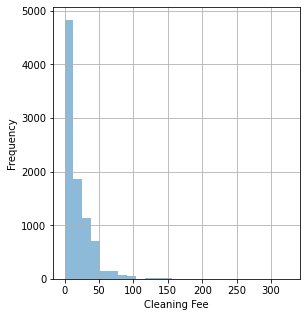

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Cleaning Fee')

En la característica Cleaning Fee se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil

In [43]:
rango_intercuartil_outliers(df,'Cleaning Fee')

Cuartil 1:  0.0
Cuartil 3:  29.0
RIC:  29.0
Corte por abajo:  -43.5
Corte por arriba:  72.5


Se va a analizar si hay outliers en Guests Included. Para eso se procede a dibujar el histograma de Guests Included.

Text(0.5, 0, 'Guests Included')

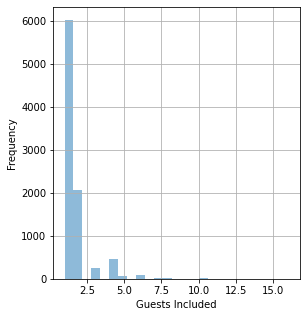

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

En la característica Guests Included no se observan outliers porque el valor mínimo es 0, y el máximo es 16, pero puede tratarse de una vivienda grande.

Se va a analizar si hay outliers en Minimum Nights. Para eso se procede a dibujar el histograma de Minimum Nights.

Text(0.5, 0, 'Minimum Nights')

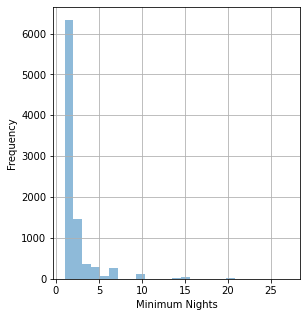

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

En la característica Minimum Nights se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [46]:
rango_intercuartil_outliers(df,'Minimum Nights')

Cuartil 1:  1.0
Cuartil 3:  3.0
RIC:  2.0
Corte por abajo:  -2.0
Corte por arriba:  6.0


Se va a analizar si hay outliers en Maximum Nights. Para eso se procede a dibujar el histograma de Maximum Nights.

Text(0.5, 0, 'Maximum Nights')

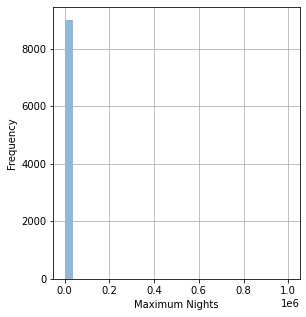

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

En la característica Maximum Nights se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [48]:
rango_intercuartil_outliers(df,'Maximum Nights')

Cuartil 1:  365.0
Cuartil 3:  1125.0
RIC:  760.0
Corte por abajo:  -775.0
Corte por arriba:  2265.0


Se va a analizar si hay outliers en Availability. Para eso se procede a dibujar el histograma de Availability.

Text(0.5, 0, 'Availability')

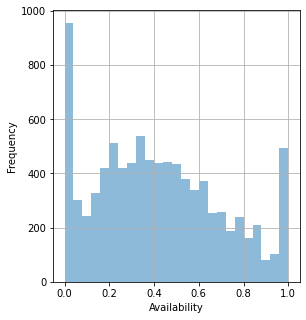

In [49]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Availability'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability')

En la característica Availability el valor mínimo es 0 y el máximo 1, y no hay ningún outlier.

Se va a analizar si hay outliers en Number of Reviews. Para eso se procede a dibujar el histograma de Number of Reviews.

Text(0.5, 0, 'Number of Reviews')

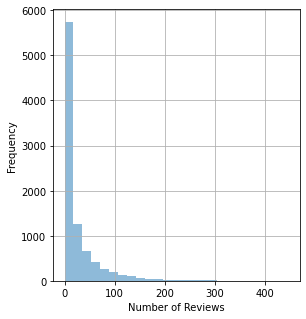

In [50]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Number of Reviews')

En la característica Number of Reviews se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [51]:
rango_intercuartil_outliers(df,'Number of Reviews')

Cuartil 1:  1.0
Cuartil 3:  31.0
RIC:  30.0
Corte por abajo:  -44.0
Corte por arriba:  76.0


Se va a analizar si hay outliers en Review Scores Rating. Para eso se procede a dibujar el histograma de Review Scores Rating.

Text(0.5, 0, 'Review Scores Rating')

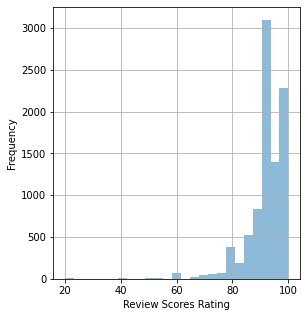

In [52]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')

En la característica Review Score Rating el valor mínimo es 20 y el máximo 100, por lo que no hay ningún outlier.

Con esto se termina el tratamiento de outliers.

Las variables continuas que se consideran son las siguientes:

In [53]:
continuas = ['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Cleaning Fee',
       'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Availability']
datosContinuos = df.loc[:,continuas]

Se categorizan las características que no son numéricas con one-hot encoding, por lo que todos los valores serán 0 ó 1.

In [54]:
from sklearn.preprocessing import LabelBinarizer

PTBinarizer = LabelBinarizer().fit(data["Property Type"])
RTBinarizer = LabelBinarizer().fit(data["Room Type"])

train_categorica_PT = PTBinarizer.transform(df["Property Type"])
train_categorica_RT = RTBinarizer.transform(df["Room Type"])

#Se unen las variables categóricas
train_categorica = np.hstack([train_categorica_PT, train_categorica_RT])

Se concatenan las variables continuas con las categóricas

In [55]:
	X_train_inic = np.hstack([datosContinuos, train_categorica])

Se normalizan tanto los datos como la variable objetivo (precio) entre 0 y 1.

In [56]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_all = min_max_scaler.fit_transform(X_train_inic)
y_train_inic = df[["Price"]]
y_train_all = min_max_scaler.fit_transform(y_train_inic)

Se divide el dataset de entrenamiento y las imágenes de entrenamiento en subconjuntos de entrenamiento y validación. La división se realiza en este momento porque ya se han limpiado las características y sus valores.

In [57]:
X_train, X_val, y_train, y_val, train_images, val_images = train_test_split(X_train_all, y_train_all, train_images_all, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {X_train.shape}')
print(f'Dimensiones del dataset de validación: {X_val.shape}')
print(f'Dimensiones de las etiquetas del dataset de training: {y_train.shape}')
print(f'Dimensiones de las etiquetas del dataset de validación: {y_val.shape}')
print(f'Dimensiones del dataset de training de imágenes: {train_images.shape}')
print(f'Dimensiones del dataset de validación de imágenes: {val_images.shape}')

Dimensiones del dataset de training: (7203, 37)
Dimensiones del dataset de validación: (1801, 37)
Dimensiones de las etiquetas del dataset de training: (7203, 1)
Dimensiones de las etiquetas del dataset de validación: (1801, 1)
Dimensiones del dataset de training de imágenes: (7203, 224, 224, 3)
Dimensiones del dataset de validación de imágenes: (1801, 224, 224, 3)


Ahora se van a realizar en el subconjunto de test todas las operaciones que se han hecho en el subconjunto de entrenamiento.

In [58]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [59]:
df_test = df_test.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary', 'Street', 'City', 'Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Experiences Offered','Cancellation Policy','Space','Zipcode','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','State','Market','Smart Location','Country Code','Country','Bed Type','Amenities','Weekly Price','Monthly Price','Extra People','Calendar Updated','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)
df_test = df_test.drop(['Square Feet','Has Availability','Security Deposit'], axis=1)

#Se codifican con one-hot las variables categóricas del conjunto de test
test_categorica_PT = PTBinarizer.transform(df_test["Property Type"])
test_categorica_RT = RTBinarizer.transform(df_test["Room Type"])
#Se unen las variables categóricas
test_categorica = np.hstack([test_categorica_PT, test_categorica_RT])

df_test['Availability'] = ((df_test['Availability 30']/30)+(df_test['Availability 60']/60)+(df_test['Availability 90']/90)+(df_test['Availability 365']/365))/4
df_test = df_test.drop(['Beds','Availability 30','Availability 60','Availability 90','Availability 365','Reviews per Month','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'], axis=1)

df_test['Cleaning Fee'].fillna(0, inplace=True)

df_test['Bathrooms'].fillna(df_test['Bathrooms'].mean(),inplace=True)
df_test['Bedrooms'].fillna(df_test['Bedrooms'].mean(), inplace=True)
df_test['Price'].fillna(df_test['Price'].mean(), inplace=True)
df_test['Review Scores Rating'].fillna(df_test['Review Scores Rating'].mean(), inplace=True)

rango_intercuartil_outliers(df_test,'Price')
df_test.loc[df_test['Bathrooms']==0,'Bathrooms']=1
df_test.loc[df_test['Bedrooms']==0,'Bedrooms']=1
rango_intercuartil_outliers(df_test,'Cleaning Fee')
rango_intercuartil_outliers(df_test,'Minimum Nights')
rango_intercuartil_outliers(df_test,'Maximum Nights')
rango_intercuartil_outliers(df_test,'Number of Reviews')

datosContinuosTest = df_test.loc[:,continuas]

X_test_inic = np.hstack([datosContinuosTest, test_categorica])

X_test = min_max_scaler.fit_transform(X_test_inic)
y_test_inic = df_test[["Price"]]
y_test = min_max_scaler.fit_transform(y_test_inic)

Cuartil 1:  30.0
Cuartil 3:  80.0
RIC:  50.0
Corte por abajo:  -45.0
Corte por arriba:  155.0
Cuartil 1:  0.0
Cuartil 3:  30.0
RIC:  30.0
Corte por abajo:  -45.0
Corte por arriba:  75.0
Cuartil 1:  1.0
Cuartil 3:  3.0
RIC:  2.0
Corte por abajo:  -2.0
Corte por arriba:  6.0
Cuartil 1:  365.0
Cuartil 3:  1125.0
RIC:  760.0
Corte por abajo:  -775.0
Corte por arriba:  2265.0
Cuartil 1:  1.0
Cuartil 3:  30.0
RIC:  29.0
Corte por abajo:  -42.5
Corte por arriba:  73.5


Se crea el modelo para regresión, diseñado para ejecutar por una rama los datos de las variables continuas y discretas, y por otra rama las imágenes. Luego se unen las dos ramas y se obtiene un valor estimado para el Precio.

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense as Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import locale

# Se definen los dos conjuntos de entradas
inputA = tf.keras.layers.Input(shape=(37,))
inputB = tf.keras.layers.Input(shape=(224,224, 3))


# Por esta rama pasan los datos discretos y continuos de la primera entrada que se han tratado del dataset
# Está formada por tres capas densas de 32, 16 y 4 neuronas respectivamente
x = Dense(32, activation="relu")(inputA)
x = Dense(16, activation="relu")(x)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)


# Por esta rama pasan las imágenes que se han descargado de las viviendas
# Está formada por una capa de reescalado de las imágenes en la que se convierten todos los valores de las imágenes en el rango de 0 a 1
# Luego una capa convolucional con 32 filtros, una capa maxpooling para reducir la dimensionalidad, una capa flatten para aplanar la entrada
# y tres capas densas de 32, 16 y 4 neuronas respectivamente
y = tf.keras.layers.Rescaling(scale=1./255)(inputB)
y = tf.keras.layers.Conv2D(32, [3,3], activation='relu')(y)
y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(y)
y = tf.keras.layers.Flatten()(y)
y = Dense(32, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# Se combina la salida de las dos ramas
combined = tf.keras.layers.Concatenate()([x.output, y.output])

#A la combinación resultante se le aplica una capa densa de 2 neuronas FullyConnected, 
#y otra capa densa de una neurona para obtener un valor de predicción de regresión
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

Se muestra el mapa del modelo

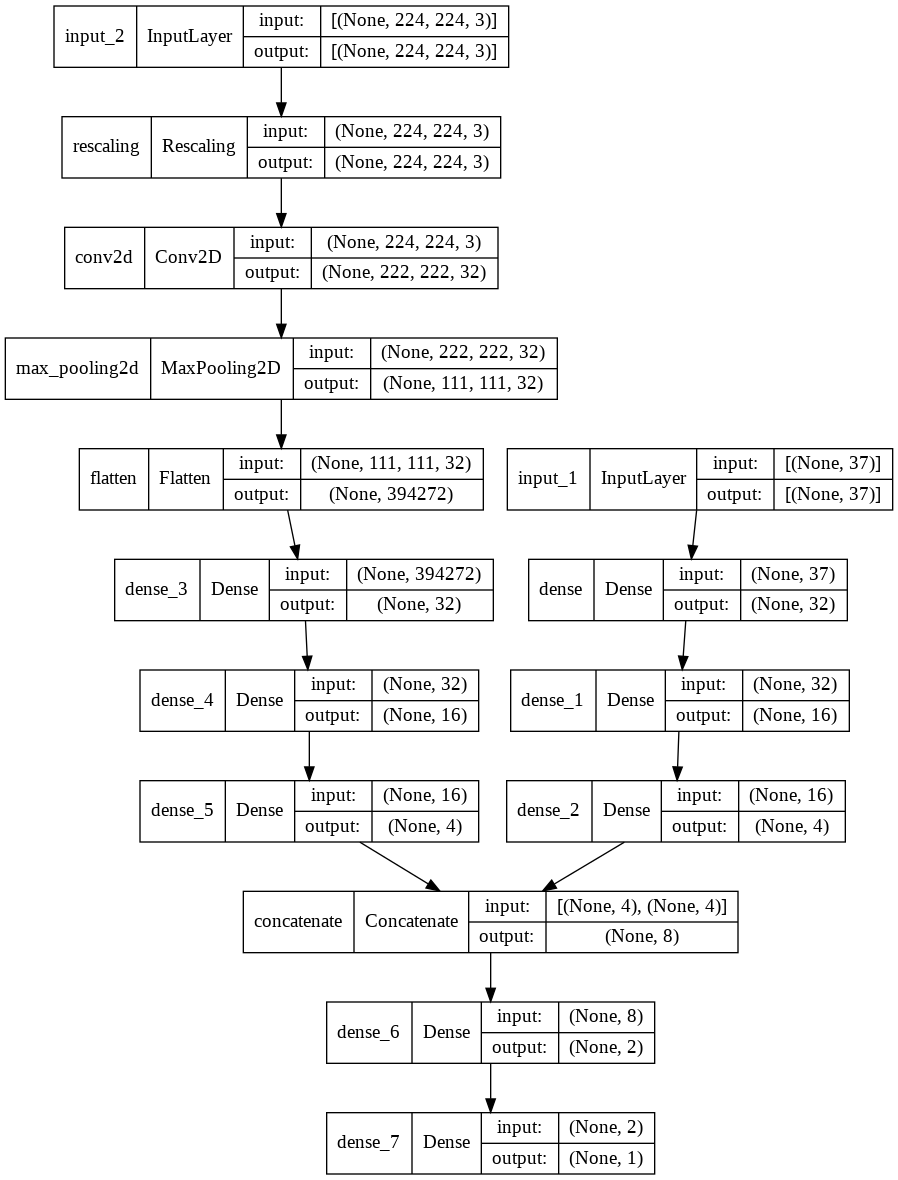

In [61]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Se compila, se entrena y se hace la predicción con el modelo.

In [62]:
#Se compila el modelo utilizando el optimizador Adam con un learning rate de 0.0001, y utilizando como función de pérdida el error cuadrático medio
#la métrica utilizada también es el error cuadrático medio
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Se entrena el modelo utilizando el conjunto de entrenamiento y se valida con el conjunto de validación
# Se realizan 50 épocas con un batch size de 8
print("[INFO] training model...")
model.fit(
	x=[X_train, train_images], y=y_train,
	validation_data=([X_val, val_images], y_val),
	epochs=50, batch_size=8)

# Se realizan las predicciones utilizando el conjunto de test
print("[INFO] predicting house prices...")
preds = model.predict([X_test, test_images])

[INFO] training model...
Epoch 1/50
901/901 [==============================] - 31s 11ms/step - loss: 0.1622 - mean_squared_error: 0.1622 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 2/50
901/901 [==============================] - 10s 11ms/step - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.0582 - val_mean_squared_error: 0.0582
Epoch 3/50
901/901 [==============================] - 10s 11ms/step - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 4/50
901/901 [==============================] - 10s 11ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 5/50
901/901 [==============================] - 10s 11ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 6/50
901/901 [==============================] - 10s 11ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0302 - val_mean_squared_error

Se realiza la evaluación del modelo, obteniendo el valor de la función de pérdida.

In [63]:
loss = model.evaluate([X_test, test_images], y_test)
print(f'Loss={loss}')

71/71 [==============================] - 1s 8ms/step - loss: 0.0277 - mean_squared_error: 0.0277
Loss=[0.027657805010676384, 0.027657805010676384]


Se realiza la desnormalización de los datos (previamente normalizados con MinMaxScaler) para poder interpretarlos.

In [64]:
y_pred = model.predict([X_test, test_images])
y_pred_dn = min_max_scaler.inverse_transform(y_pred)
y_test_dn = min_max_scaler.inverse_transform(y_test)
error_dn = np.abs(y_pred_dn - y_test_dn)

Se calculan el error medio absoluto y el error cuadrático medio de los valores predecidos con respecto a los valores reales de la variable objetivo precio.

In [65]:
print(f'Error medio absoluto: {error_dn.mean()}')
print(f'Error cuadrático medio: {np.mean(error_dn**2)}')

Error medio absoluto: 16.48239611054822
Error cuadrático medio: 581.5053243400025


Se muestran individualmente todas las predicciones que se han realizado comparándolas con el valor real del precio y mostrando la diferencia entre ambas, que es el error obtenido.

In [66]:
for i in range(len(y_test_dn)):
  print('Registro -', i, '- Precio real', y_test_dn[i], 'Precio estimado', y_pred_dn[i], 'Error en la estimación', error_dn[i])

Registro - 0 - Precio real [100.] Precio estimado [121.35229] Error en la estimación [21.35228729]
Registro - 1 - Precio real [90.] Precio estimado [55.682518] Error en la estimación [34.31748199]
Registro - 2 - Precio real [18.] Precio estimado [30.590652] Error en la estimación [12.59065247]
Registro - 3 - Precio real [27.] Precio estimado [34.594856] Error en la estimación [7.59485626]
Registro - 4 - Precio real [30.] Precio estimado [28.883396] Error en la estimación [1.11660385]
Registro - 5 - Precio real [155.] Precio estimado [146.4384] Error en la estimación [8.56159973]
Registro - 6 - Precio real [80.] Precio estimado [73.22334] Error en la estimación [6.7766571]
Registro - 7 - Precio real [50.] Precio estimado [76.46375] Error en la estimación [26.46375275]
Registro - 8 - Precio real [32.] Precio estimado [38.9603] Error en la estimación [6.96030045]
Registro - 9 - Precio real [55.] Precio estimado [58.045113] Error en la estimación [3.04511261]
Registro - 10 - Precio real [1

En esta práctica se ha optado por solucionar el problema mediante regresión. Debido a limitaciones de tiempo no se ha podido abordar el problema con clasificación. 

Los resultados obtenidos no son muy buenos, y los motivos pueden ser los siguientes:
- Los datos utilizados son escasos para que una red neuronal sea efectiva.
- Las imágenes utilizadas no son de la misma estancia, es decir, hay imágenes de diferentes estancias de las viviendas, por lo que puede que la red convolucional no haya sido capaz de extraer información valiosa de las imágenes.
- Se hayan elegido unas características que no son buenas para predecir el precio de las viviendas.
- Se hayan elegido unos hiperparámetros y capas en la red neuronal que no son efectivas.

Para mejorar los resultados se podrían elegir otras variables o definir nuevas variables a partir de las existentes. Por otra parte, se podrían ajustar los valores de los hiperparámetros de la red neuronal, así como establecer otras combinaciones de capas. Pero debido a limitaciones de tiempo no se han podido afrontar estas mejoras que probablemente mejorarían los resultados obtenidos.

Se ha observado que cuando se aumentaba el número y tipo de capas, el número de épocas a considerar y/o el número de neuronas por capa densa, los resultados obtenidos se generalizaban y empeoraban a los obtenidos. El motivo de esto puede ser debido a que se dispone de pocos datos para procesar en la red neuronal.